<a href="https://colab.research.google.com/github/r7sy/SuttonBarto-RL2018-Sols/blob/master/Chapter%2002/Bandit_algorithms_parameter_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bandit Algorithms Parameter Study

This notebook recreates figure 2.6 from "Reinforcement Learning an Introduction second edition"  by Richard S. Sutton and Andrew G. Barto. It also contains the solution to exercise 2.11; The exercise is defined in the book as follows:

*Exercise 2.11* (programming) Make a figure analogous to Figure 2.6 for the nonstationary
case outlined in Exercise 2.5. Include the constant-step-size $\epsilon$-greedy algorithm with
$\alpha$ = 0.1. Use runs of 200,000 steps and, as a performance measure for each algorithm and
parameter setting, use the average reward over the last 100,000 steps.

Due to time constraints this notebook uses runs of 20000 steps and uses the average reward over the last 1000 steps to plot the figure.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand

In [0]:
def getKArmedBandit(k=10,mean_reward=0.0,reward_variance=1.0):
    return np.random.normal(loc=mean_reward,scale=reward_variance,size=k)
def getReward(mean,variance=1.0):
    return rand.normalvariate(mean,variance)
def updateBandit(q_values,update_mean=0,update_variance=0.01):
    return q_values+np.random.normal(update_mean,update_variance,len(q_values))

def epsilonGreedy(q_values,epsilon):
    if np.random.uniform(0,1)>epsilon:
        return np.argmax(q_values)
    return rand.randint(0,len(q_values)-1)

def ucb(q_values,n,c,t):
    if 0 in n:
        return np.where(n==0)[0][0]
    return np.argmax(q_values+c*np.sqrt(np.log(t)/n))


def runBanditProblem(q_values,method='e-greedy',epsilon=0.1,timesteps=10000,c=1,alpha=None,nonstationary=False,Q_values=None):
    rewards=np.zeros(shape=(timesteps,))
    h_values=np.zeros(shape=q_values.shape)
    average_reward=0
    if Q_values is None:
        Q_values=np.zeros(shape=q_values.shape)
    
    n=np.zeros(shape=q_values.shape)
    for timestep in range(timesteps):
        if nonstationary:
            q_values=updateBandit(q_values)
        optimal_action=np.argmax(q_values)
        
     
        if method=='ucb':
          action=ucb(Q_values,n,c,timestep)
        elif method=='e-greedy':
          action=epsilonGreedy(Q_values,epsilon)
        else :
          probs=np.exp(h_values) / np.sum(np.exp(h_values), axis=0)
          action=np.random.choice(range(q_values.shape[0]),p=probs)
          
       
        rewards[timestep]=getReward(q_values[action])
        n[action]+=1
        if alpha is None:
            Q_values[action]+=(1/n[action])*(rewards[timestep]-Q_values[action])
        else:
            if method=='gradient':
              average_reward+=(1/(timestep+1))*(rewards[timestep]-average_reward)
              probs=np.exp(h_values) / np.sum(np.exp(h_values), axis=0)
              h_values=[ h_values[i]+alpha*(rewards[timestep]-average_reward)*(1-probs[i]) if\
                        action==i else\
                        h_values[i]-alpha*(rewards[timestep]-average_reward)*probs[i]\
                         for i in range(len(h_values))]
            Q_values[action]+=alpha*(rewards[timestep]-Q_values[action])
           
    return rewards

In [0]:
runs=1000
timesteps=1000
epsilons=[np.math.pow(2,x)/128 for x in range(0,6)]
e_reward_averages=np.zeros((runs,len(epsilons)))

for j in range(runs):
    for i,epsilon in enumerate(epsilons):
        rewards=runBanditProblem(q_values=getKArmedBandit(),alpha=None,method="e-greedy",epsilon=epsilon,timesteps=timesteps)
        e_reward_averages[j,i]=np.average(rewards) 

In [0]:
cs=[np.math.pow(2,x)/16 for x in range(0,7)]
ucb_reward_averages=np.zeros((runs,len(cs)))

for j in range(runs):
    for i,c in enumerate(cs):
        rewards=runBanditProblem(q_values=getKArmedBandit(),method="ucb",c=c,timesteps=timesteps)
        ucb_reward_averages[j,i]=np.average(rewards) 

In [0]:
initial_values=[np.math.pow(2,x)/4 for x in range(0,5)]
optimistic_greedy_reward_averages=np.zeros((runs,len(initial_values)))
alphas=[0.1]
for j in range(runs):
    for i,initial_value in enumerate(initial_values):
        rewards=runBanditProblem(q_values=getKArmedBandit(),method="e-greedy",alpha=0.1,epsilon=0.0,timesteps=timesteps,Q_values=np.full(10,initial_value))
        optimistic_greedy_reward_averages[j,i]=np.average(rewards) 

In [0]:
alphas=[np.math.pow(2,x)/32 for x in range(0,7)]
gradient_reward_averages=np.zeros((runs,len(alphas)))

for j in range(runs):
    for i,alpha in enumerate(alphas):
        rewards=runBanditProblem(q_values=getKArmedBandit(),alpha=alpha,method="gradient",timesteps=timesteps)
        gradient_reward_averages[j,i]=np.average(rewards) 

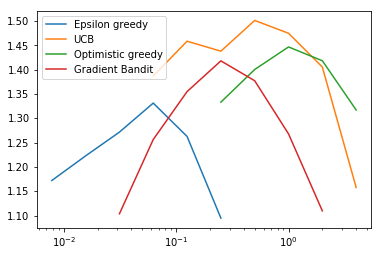

In [7]:
plt.plot(epsilons,np.average(e_reward_averages,axis=0),label="Epsilon greedy")
plt.plot(cs,np.average(ucb_reward_averages,axis=0),label="UCB")
plt.plot(initial_values,np.average(optimistic_greedy_reward_averages,axis=0),label="Optimistic greedy")
plt.plot(alphas,np.average(gradient_reward_averages,axis=0),label="Gradient Bandit")
plt.xscale("log")
plt.legend()
plt.show()

In [0]:
runs=1000
timesteps=20000
epsilons=[np.math.pow(2,x)/128 for x in range(0,6)]
e_reward_averages=np.zeros((runs,len(epsilons)))

for j in range(runs):
    for i,epsilon in enumerate(epsilons):
        rewards=runBanditProblem(q_values=getKArmedBandit(),alpha=None,method="e-greedy",epsilon=epsilon,timesteps=timesteps,nonstationary=True)
        e_reward_averages[j,i]=np.average(rewards) 

In [0]:
cs=[np.math.pow(2,x)/16 for x in range(0,7)]
ucb_reward_averages=np.zeros((runs,len(cs)))

for j in range(runs):
    for i,c in enumerate(cs):
        rewards=runBanditProblem(q_values=getKArmedBandit(),method="ucb",c=c,timesteps=timesteps,nonstationary=True)
        ucb_reward_averages[j,i]=np.average(rewards) 

In [0]:
initial_values=[np.math.pow(2,x)/4 for x in range(0,5)]
optimistic_greedy_reward_averages=np.zeros((runs,len(initial_values)))
alphas=[0.1]
for j in range(runs):
    for i,initial_value in enumerate(initial_values):
        rewards=runBanditProblem(q_values=getKArmedBandit(),method="e-greedy",alpha=0.1,epsilon=0.0,timesteps=timesteps,Q_values=np.full(10,initial_value),nonstationary=True)
        optimistic_greedy_reward_averages[j,i]=np.average(rewards) 

In [0]:
alphas=[np.math.pow(2,x)/32 for x in range(0,7)]
gradient_reward_averages=np.zeros((runs,len(alphas)))

for j in range(runs):
    for i,alpha in enumerate(alphas):
        rewards=runBanditProblem(q_values=getKArmedBandit(),alpha=alpha,method="gradient",timesteps=timesteps,nonstationary=True)
        gradient_reward_averages[j,i]=np.average(rewards) 

In [0]:
epsilons=[np.math.pow(2,x)/128 for x in range(0,6)]
e2_reward_averages=np.zeros((runs,len(epsilons)))

for j in range(runs):
    for i,epsilon in enumerate(epsilons):
        rewards=runBanditProblem(q_values=getKArmedBandit(),alpha=0.1,method="e-greedy",epsilon=epsilon,timesteps=timesteps,nonstationary=True)
        e2_reward_averages[j,i]=np.average(rewards) 

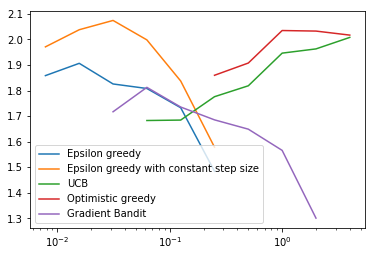

In [12]:
plt.plot(epsilons,np.average(e_reward_averages[-1000:],axis=0),label="Epsilon greedy")
plt.plot(epsilons,np.average(e2_reward_averages[-1000:],axis=0),label="Epsilon greedy with constant step size")
plt.plot(cs,np.average(ucb_reward_averages[-1000:],axis=0),label="UCB")
plt.plot(initial_values,np.average(optimistic_greedy_reward_averages[-1000:],axis=0),label="Optimistic greedy")
plt.plot(alphas,np.average(gradient_reward_averages[-1000:],axis=0),label="Gradient Bandit")
plt.xscale("log")
plt.legend()
plt.show()